In [1]:
from SquareGrid import SquareGrid
import torch.nn.functional as tnn
import torch
use_cuda = 0
torchdeviceId = torch.device('cuda:0') if use_cuda else 'cpu'
torchdtype = torch.float64
import time 
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [13]:
l=16
G=SquareGrid(l)

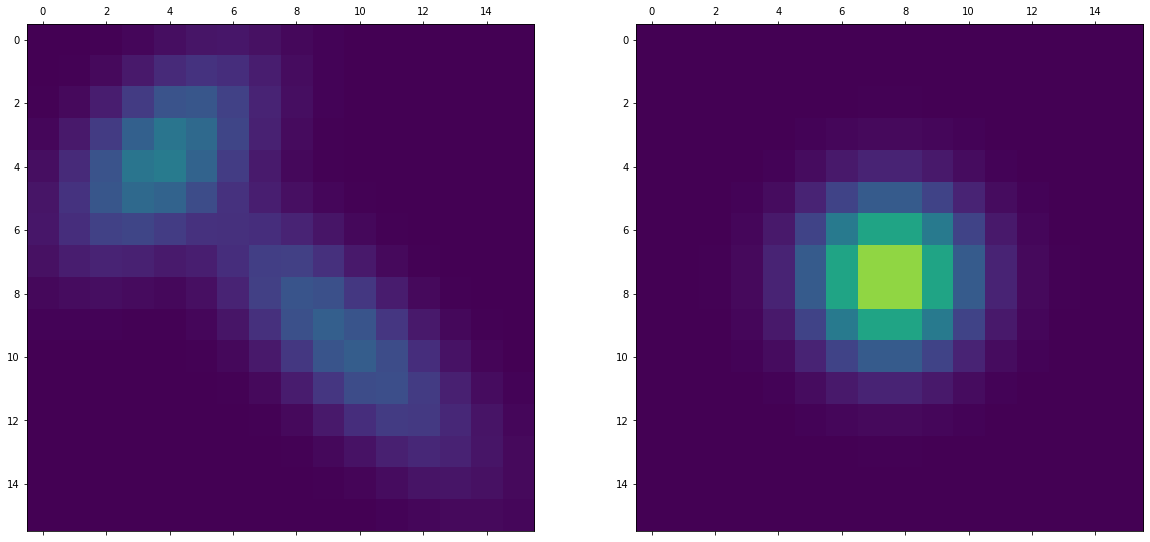

In [14]:
G1=torch.Tensor([[10,0],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
G2=torch.Tensor([[10,10],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
G3=torch.Tensor([[10,-15],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
mu_2 = G.gaussian(0,0,G1)

mu_1 = G.normalize(G.gaussian(-.5,-.5,G2)+G.gaussian(.25,.25,G3))

G.plot_pair(mu_1,mu_2)

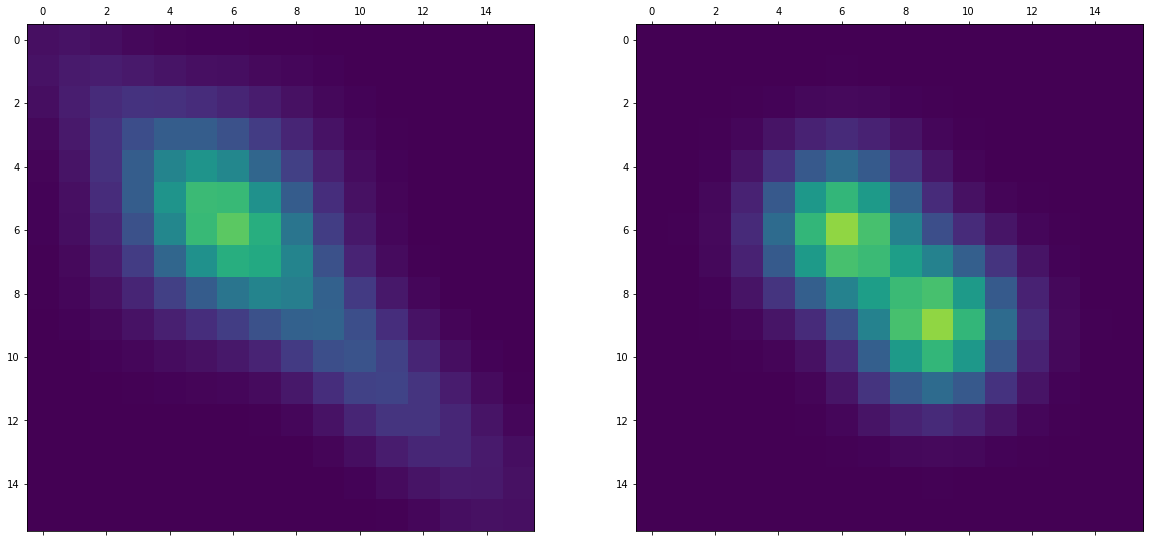

In [15]:
G1=torch.Tensor([[12,0],[0,12]]).to(dtype=torchdtype, device=torchdeviceId)
G2=torch.Tensor([[10,-18],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
G3=torch.Tensor([[7,0],[0,7]]).to(dtype=torchdtype, device=torchdeviceId)
mu_2 = G.normalize(G.gaussian(.2,.2,G1)+ G.gaussian(-.2,-.2,G1))

mu_1 = G.normalize(G.gaussian(0,0,G2)+G.gaussian(-.25,-.25,G3))

G.plot_pair(mu_1,mu_2)

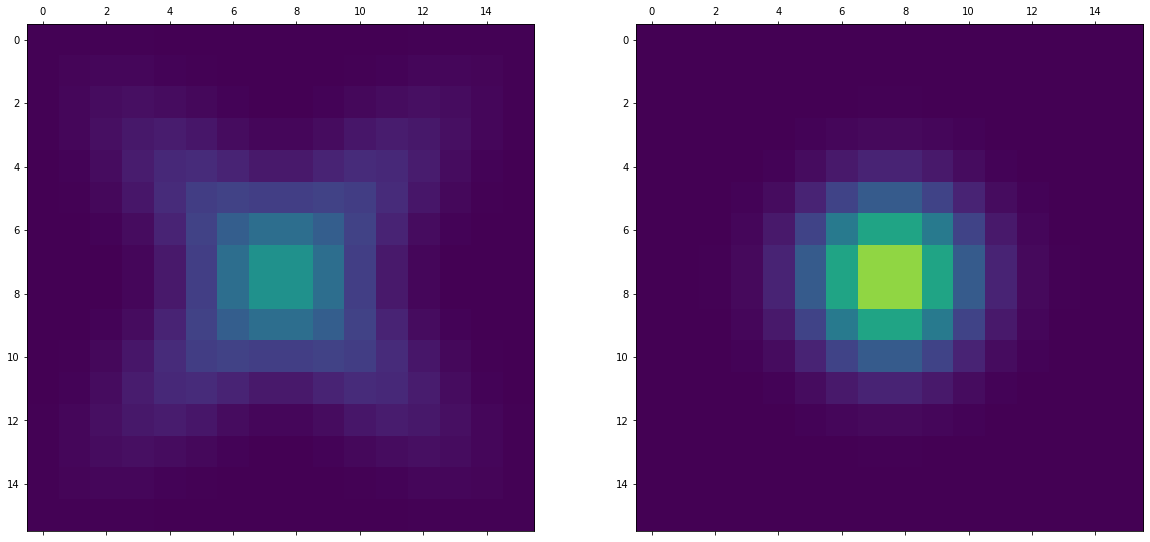

In [16]:
G1=torch.Tensor([[10,0],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
G2=torch.Tensor([[10,16],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
G3=torch.Tensor([[10,-16],[0,10]]).to(dtype=torchdtype, device=torchdeviceId)
mu_2 = G.gaussian(0,0,G1)

mu_1 = G.normalize(G.gaussian(0,0,G2)+G.gaussian(0,0,G3))

G.plot_pair(mu_1,mu_2)

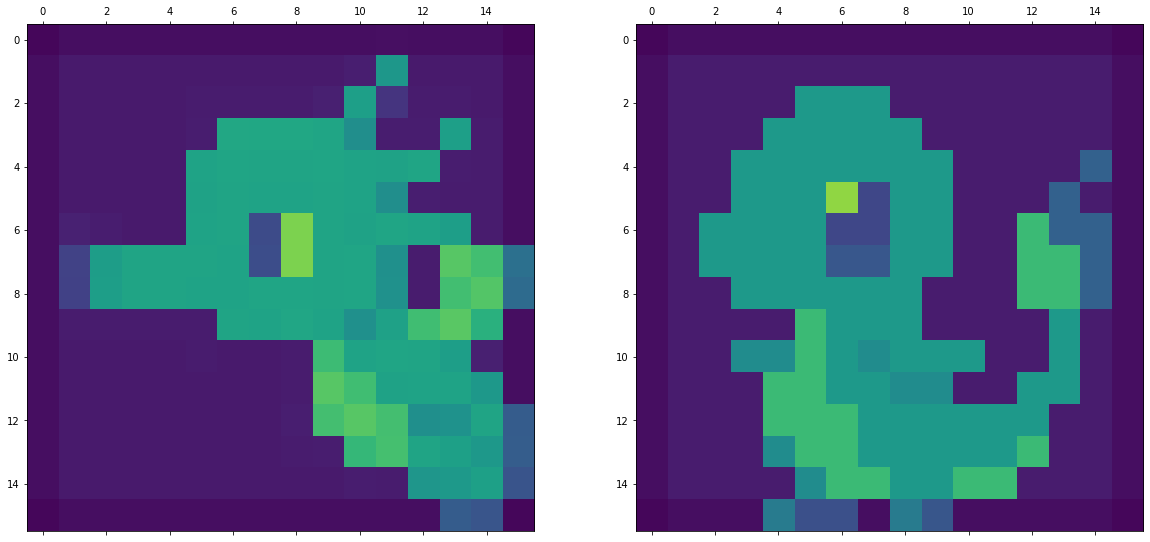

In [17]:
mu_2 = G.load_dist("data/cmndr.png")
mu_1 = G.load_dist("data/2.jpg")
G.plot_pair(mu_1,mu_2)

In [18]:
T=60
match_coeff=1e10
path_coeff=1


In [19]:
def L(out):
    out=torch.unsqueeze(out,0)
    weight = torch.Tensor([[[[10,10,10],[10,0,10],[10,10,10]]]]).to(dtype=torchdtype, device=torchdeviceId)
    out = tnn.conv2d(out,weight.repeat(2,1,1,1), padding='same',groups=2)
    #out = tnn.conv2d(out,weight.repeat(2,1,1,1), padding='same',groups=2)
    #out = tnn.conv2d(out,weight.repeat(2,1,1,1), padding='same',groups=2)
    return out[0]

In [20]:
start =time.time()
vecs,ps = G.OT(mu_1.flatten(),mu_2.flatten(),T,match_coeff,path_coeff,max_iter=1000)
pl_pathlength = G.path_length(mu_1.flatten(),vecs)
N=vecs.shape[0]

In [21]:
G.plot_sequence(ps,vecs)
G.save_gif(ps)

ValueError: Image size of 85680x720 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 85680x720 with 119 Axes>

In [22]:

G.save_gif(ps)

In [11]:
print(pl_pathlength.sum())

tensor(2.1846, dtype=torch.float64)
